In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go 
print(__version__)
import cufflinks as cf
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

2.2.2


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [18]:
#Importing file of Year 2017
h2017 =  pd.read_csv('2017.csv')
h2017.head()


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [19]:
#Checking Data Type
h2017.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [16]:
#No Data Cleaning was done as it was already done. 

In [23]:
#Doing Geographical Plotting

data = dict(type = 'choropleth',
             locations = h2017['Country'],
            locationmode = "country names",
            colorscale= 'YIOrRd',
            text= h2017['Country'],
            z=h2017['Happiness.Score'],
            colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Happiness Score',
                geo = dict(showframe = False,projection = {'type':'Mercator'}))

In [25]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [26]:
# It can be inferred from the Plot above that people in North America are the happiest  
# People in Africa are not happy enough , this is evident for developing nations
# All the Developed Nations seems to be Happiest, which makes sense.

In [ ]:
# Checking the correlation of the Happiness Score with the over variables such as Family, Freedom, Generosity,etc.

In [27]:
h2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


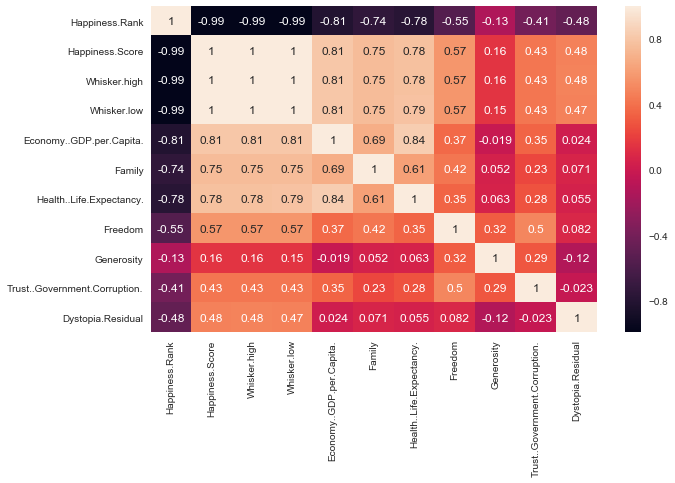

In [38]:
correlation = h2017.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)

In [ ]:
#This shows that Happiness Score is dependent on Economy and Per Capita Income , Family, Life Expectency, Whisker High, and Whisker Low 

In [41]:
from scikit.learn import LinearRegression

ModuleNotFoundError: No module named 'scikit'

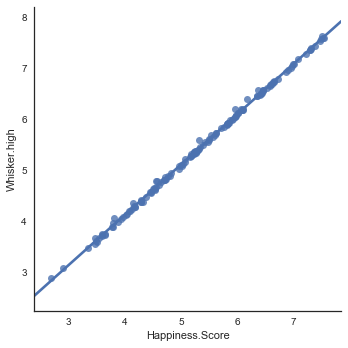

In [42]:
sns.lmplot(data=h2017,x='Happiness.Score',y='Whisker.high')

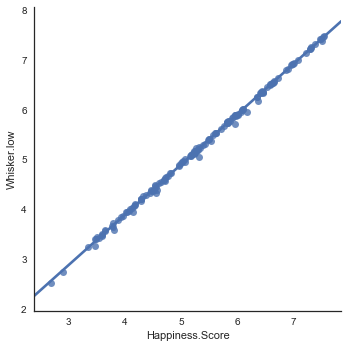

In [43]:
sns.lmplot(data=h2017,x='Happiness.Score',y='Whisker.low')

In [44]:
#Whisker.high and Whisker.low denotes the confidence and support level of the ratings done.  
#Whisker.high shows the highest confidence level whereas Whisker.Low shows the lowest Whisker Value
#It is evident that Happiness.Score is linked to Whisker Value. Higher the Whisker Value, higher the Happiness Score

In [45]:
#Removing the columns Happiness Rank, Whisker.High and Whisker Low

In [48]:
h2017_new = h2017.drop(columns=['Happiness.Rank','Whisker.high', 'Whisker.low'])

In [49]:
h2017_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
Country                          155 non-null object
Happiness.Score                  155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(8), object(1)
memory usage: 11.0+ KB


In [51]:
#As inferred , Economy and Per Capita Income , Family, Life Expectency,are important. Hence, I shall be plotting them against Happiness Score

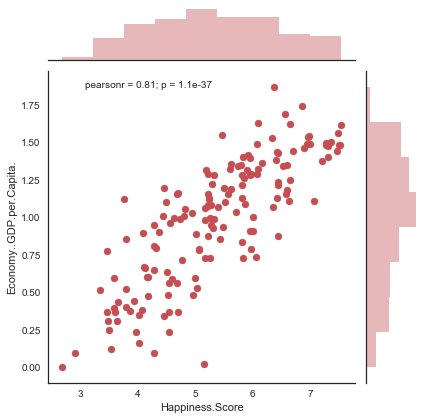

In [61]:
#Checking Happiness Score vs Economy
sns.jointplot(x='Happiness.Score', y='Economy..GDP.per.Capita.', data=h2017_new,dropna=True,color='r', kind='scatter') 

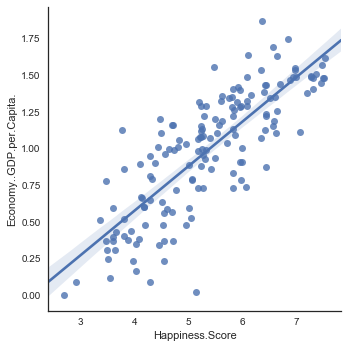

In [62]:
sns.lmplot(x='Happiness.Score', y='Economy..GDP.per.Capita.', data=h2017_new)

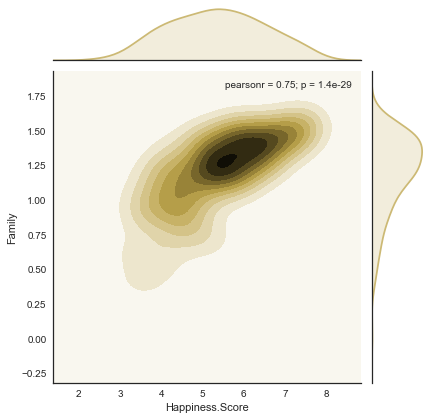

In [68]:
#Checking Happiness Score vs Family
sns.jointplot(x='Happiness.Score', y='Family', data=h2017_new,dropna=True,color='y', kind='kde') 

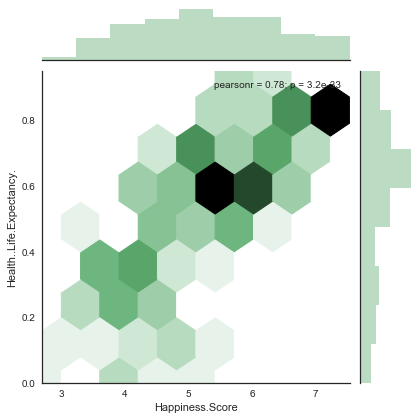

In [67]:
#Checking Happiness Score vs Health Life Expectancy
sns.jointplot(x='Happiness.Score', y='Health..Life.Expectancy.', data=h2017_new,dropna=True,color='g', kind='hex') 

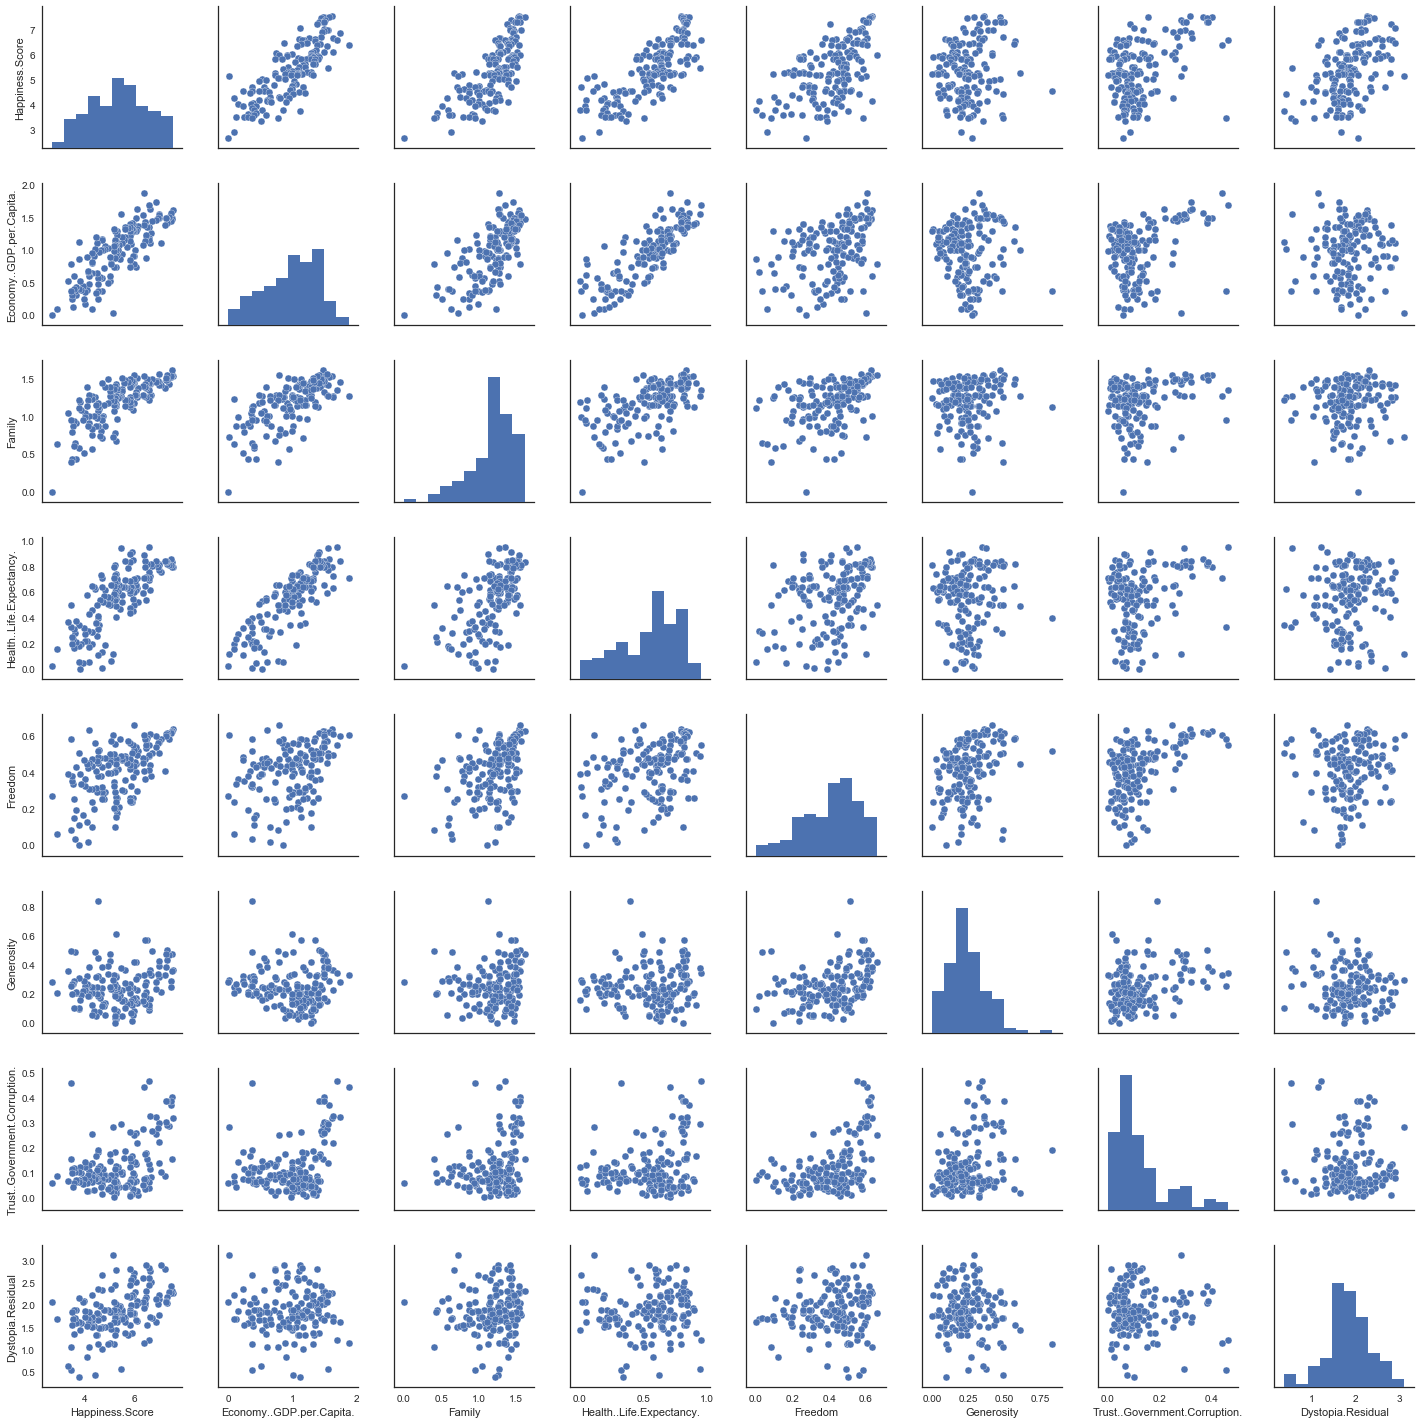

In [69]:
sns.pairplot(h2017_new)

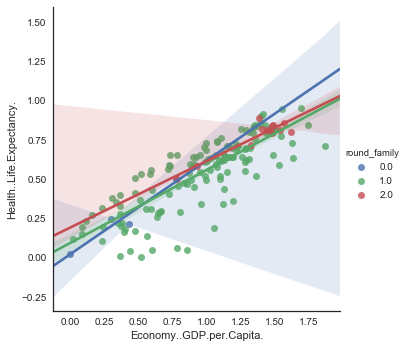

In [78]:
#The correlation matrix shows that GDP is dependent on Life Expectancy
sns.lmplot(x='Economy..GDP.per.Capita.',y='Health..Life.Expectancy.', data=h2017_new, hue='round_family')

In [77]:
h2017_new['round_family'] = round(h2017_new['Family'])

In [79]:
round(h2017_new['Family'])

0      2.0
1      2.0
2      2.0
3      2.0
4      2.0
5      1.0
6      1.0
7      2.0
8      1.0
9      2.0
10     1.0
11     1.0
12     1.0
13     1.0
14     2.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
125    1.0
126    1.0
127    1.0
128    1.0
129    1.0
130    1.0
131    1.0
132    1.0
133    1.0
134    1.0
135    1.0
136    1.0
137    1.0
138    1.0
139    1.0
140    1.0
141    1.0
142    0.0
143    1.0
144    1.0
145    1.0
146    1.0
147    1.0
148    1.0
149    0.0
150    1.0
151    0.0
152    1.0
153    1.0
154    0.0
Name: Family, Length: 155, dtype: float64